<a href="https://colab.research.google.com/github/RajatTanwar1/minor_project/blob/main/project_work_module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step -1
import the required files and package


In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/RajatTanwar1/minor_project/main/HR_comma_%20-%20Sheet1.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#step-2
Data  cleaning<br>
Dataset used here is already clean 



In [5]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
for col in df.columns:
  print(col, " : ",len(df[col].unique()),'labels')

satisfaction_level  :  92 labels
last_evaluation  :  65 labels
number_project  :  6 labels
average_montly_hours  :  215 labels
time_spend_company  :  8 labels
Work_accident  :  2 labels
left  :  2 labels
promotion_last_5years  :  2 labels
Department  :  10 labels
salary  :  3 labels



#step-3
Dealing with Text-Data<br>
Two types of categorical data<br>
Label Encoding<br>
Ordinal Encoding


In [7]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [8]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Applying Label encoding

In [9]:
emp=pd.get_dummies(df,columns=['Department'],drop_first=True)

In [10]:
emp.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


Move the variable "left" to the back of the table

In [11]:
last=emp['left']
emp.drop(labels=['left'],axis=1,inplace=True)
emp.insert(0,'left',last)
emp.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1,0.38,0.53,2,157,3,0,0,low,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,medium,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,medium,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,low,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,low,0,0,0,0,0,0,1,0,0


Applying ordinal encoding

In [12]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
order_label={"low":1,"medium":2,"high":3}

In [14]:
emp["salary"]=emp["salary"].map(order_label)

In [15]:
emp.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0


In [16]:
emp[emp['salary']==3].head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
72,1,0.45,0.49,2,149,3,0,0,3,0,0,0,0,0,1,0,0,0
111,1,0.09,0.85,6,289,4,0,0,3,0,0,1,0,0,0,0,0,0
189,1,0.44,0.51,2,156,3,0,0,3,0,0,0,0,0,0,0,0,1
267,1,0.45,0.53,2,129,3,0,0,3,0,0,0,0,0,0,0,0,1
306,1,0.37,0.46,2,149,3,0,0,3,0,0,0,0,1,0,0,0,0


#Heat map

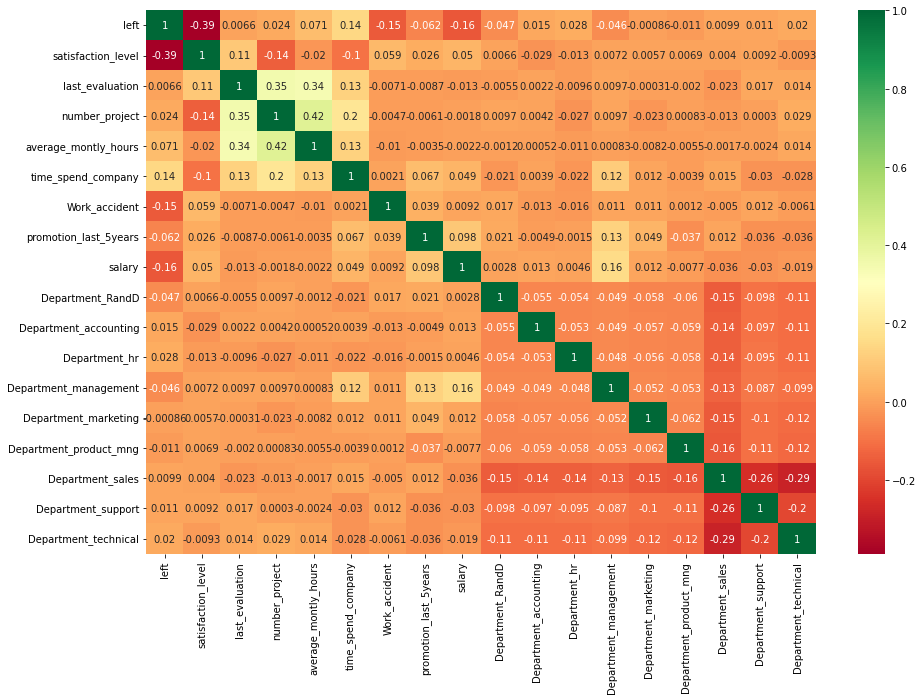

In [17]:
corrmat=emp.corr()
top=corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(emp[top].corr(),annot=True,cmap='RdYlGn')

#step 4
Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
target_name="left"
X = emp.drop('left', axis=1)
y=emp[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
X_train[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
9838,1.00,0.61,3,188,4,0,0,1,0,0,0,0,0,1,0,0,0
7689,0.16,0.78,4,196,5,0,0,3,0,0,0,0,0,0,0,0,1
6557,0.80,0.80,3,175,2,0,0,2,1,0,0,0,0,0,0,0,0
6872,0.66,0.86,4,112,6,0,0,2,0,1,0,0,0,0,0,0,0
820,0.11,0.93,7,284,4,0,0,1,0,0,0,0,0,0,0,0,1


In [21]:
y_train[:5]

9838    0
7689    0
6557    0
6872    0
820     1
Name: left, dtype: int64

#step 5
<h3>Model building 

<h3>Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score


In [23]:
skk=StratifiedKFold(shuffle=True,n_splits=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

confusion matrix

In [24]:
pre=logreg.predict(X_test)

In [25]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual or Truth')
    plt.xlabel('Prediction')

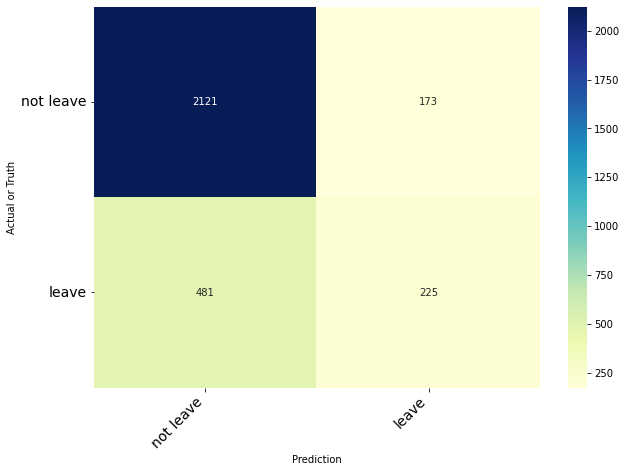

In [26]:
cm = confusion_matrix(y_test,pre)
print_confusion_matrix(cm,["not leave","leave"])

In [27]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.32      0.41       706

    accuracy                           0.78      3000
   macro avg       0.69      0.62      0.64      3000
weighted avg       0.76      0.78      0.76      3000



In [28]:
print ("Logistic ModeL")
logit_roc_auc = roc_auc_score(y_test,logreg.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)

Logistic ModeL
Logistic AUC = 0.62


<H3>DECISION TREE

In [29]:
treemodel = tree.DecisionTreeClassifier()
skk=StratifiedKFold(shuffle=True,n_splits=10)
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
score3=cross_val_score(treemodel,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score3.mean())

0.9795818042813457


In [31]:
score2=cross_val_score(treemodel,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score2.mean())

0.9583333333333334


In [32]:
pretree=treemodel.predict(X_test)

In [33]:
print(classification_report(y_test,pretree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.93      0.96      0.95       706

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



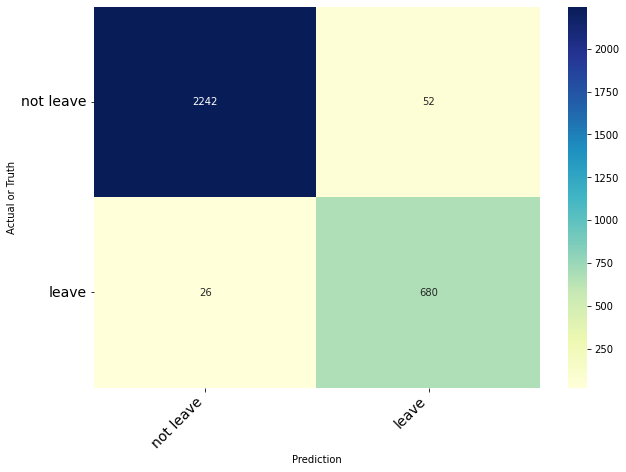

In [34]:
cm = confusion_matrix(y_test,pretree)
print_confusion_matrix(cm,["not leave","leave"])

In [35]:
print ("Decision Tree Model")
dt_roc_auc = roc_auc_score(y_test,treemodel.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)


Decision Tree Model
Decision Tree AUC = 0.97


<h3>Random Forest

In [36]:
rtreemodel = RandomForestClassifier()
rtreemodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rpretree=rtreemodel.predict(X_test)

In [38]:
score7=cross_val_score(rtreemodel,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score7.mean())

0.9908325688073395


In [39]:
score8=cross_val_score(rtreemodel,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score8.mean())

0.9800000000000001


In [40]:
print(classification_report(y_test,rpretree))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



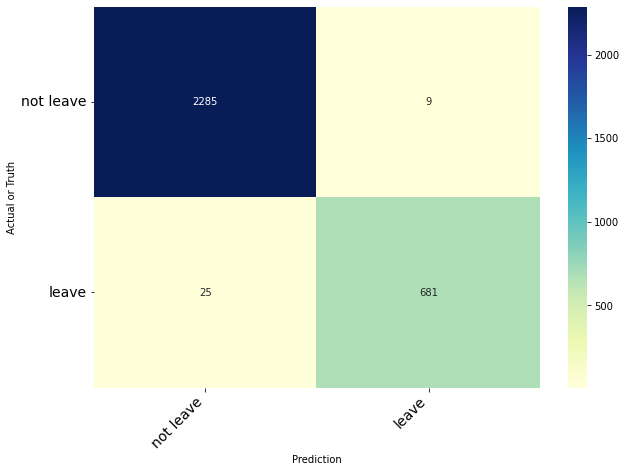

In [41]:
cm = confusion_matrix(y_test,rpretree)
print_confusion_matrix(cm,["not leave","leave"])

In [42]:
print ("Random Forest Model")
rf_roc_auc = roc_auc_score(y_test, rtreemodel.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)

Random Forest Model
Random Forest AUC = 0.98


support vector machine 

In [43]:
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
svcpre=svc.predict(X_test)

In [45]:
score11=cross_val_score(svc,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score11.mean())

0.7828154017236587


In [46]:
score12=cross_val_score(svc,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score12.mean())

0.7646666666666667


In [47]:
print(classification_report(y_test,svcpre))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2294
           1       0.98      0.08      0.16       706

    accuracy                           0.78      3000
   macro avg       0.88      0.54      0.52      3000
weighted avg       0.83      0.78      0.71      3000



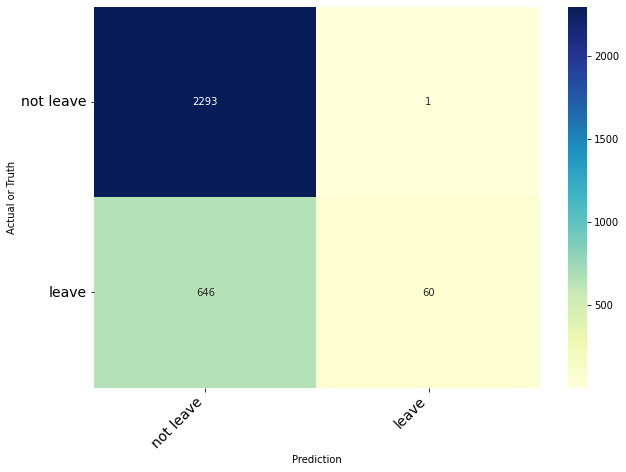

In [48]:
cm = confusion_matrix(y_test,svcpre)
print_confusion_matrix(cm,["not leave","leave"])

In [49]:
print ("Support Vector Machine")
svm_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
print ("SVM AUC = %2.2f" % svm_roc_auc)

Support Vector Machine
SVM AUC = 0.54


ada boost

In [50]:
from sklearn.ensemble import AdaBoostClassifier


In [51]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=400, random_state=None)

In [52]:
adapre=ada.predict(X_test)

In [53]:
print(classification_report(y_test,adapre))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2294
           1       0.93      0.90      0.92       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



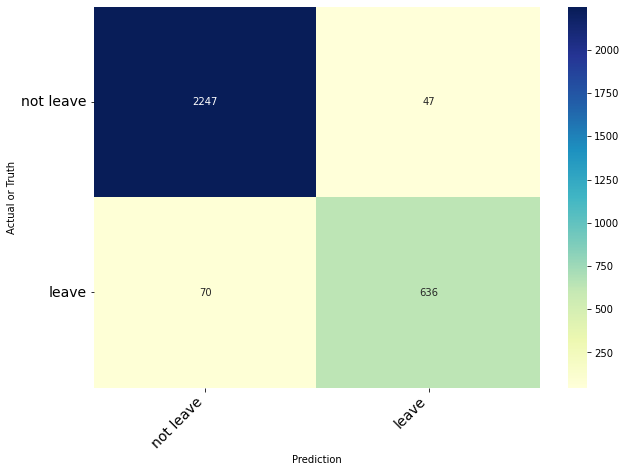

In [54]:
cm = confusion_matrix(y_test,adapre)
print_confusion_matrix(cm,["not leave","leave"])

In [55]:
print ("AdaBoost Model")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)

AdaBoost Model
AdaBoost AUC = 0.94


AUC GRAPH

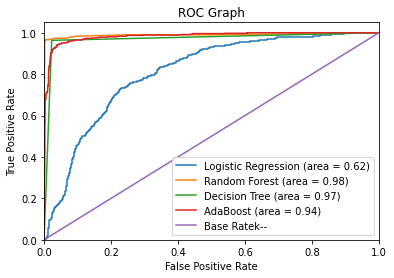

In [56]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,rtreemodel.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, treemodel.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot Support Vector Tree Tree ROC
plt.plot(label='Support vector machine (area = %0.2f)' % svm_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

SAVING THE  BEST MODEL 

In [60]:
import pickle

In [61]:
with open('rajat_model_pickle_3','wb') as file:   # save model
    pickle.dump(rtreemodel,file)

In [62]:
with open('rajat_model_pickle_3','rb') as file:       # Run model
    rajat_3= pickle.load(file)